<a href="https://colab.research.google.com/github/yashwanthjilla7/INFO-5731/blob/main/Jilla_Yashwanth_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import string


In [4]:
# Load the training dataset
train_data = pd.read_csv("train.csv")

# Select the textual features for topic modeling
textual_features = ["Neighborhood", "Condition1", "SaleCondition"]


In [5]:
# Preprocessing function
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuations]
    return tokens

In [7]:
nltk.download('punkt')

# Concatenate textual features into a single text column
train_data['text'] = train_data[textual_features].apply(lambda row: ' '.join(row), axis=1)

# Preprocess the text column
train_data['processed_text'] = train_data['text'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(train_data['processed_text'])
corpus = [dictionary.doc2bow(doc) for doc in train_data['processed_text']]

# LDA Model
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
# Printing the top 10 clusters for topic modeling
print("Top 10 clusters for topic modeling:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Cluster {idx}: {topic}")

Top 10 clusters for topic modeling:
Cluster 0: 0.541*"partial" + 0.304*"norm" + 0.139*"nridght" + 0.000*"clearcr" + 0.000*"normal" + 0.000*"stonebr" + 0.000*"blmngtn" + 0.000*"collgcr" + 0.000*"somerst" + 0.000*"timber"
Cluster 1: 0.288*"normal" + 0.187*"brkside" + 0.173*"norm" + 0.154*"artery" + 0.081*"oldtown" + 0.045*"family" + 0.036*"veenker" + 0.016*"rrnn" + 0.007*"rrne" + 0.002*"edwards"
Cluster 2: 0.318*"normal" + 0.302*"norm" + 0.245*"names" + 0.062*"crawfor" + 0.045*"idotrr" + 0.011*"npkvill" + 0.007*"family" + 0.005*"posa" + 0.000*"somerst" + 0.000*"collgcr"
Cluster 3: 0.319*"norm" + 0.301*"normal" + 0.116*"sawyerw" + 0.108*"mitchel" + 0.083*"timber" + 0.055*"swisu" + 0.007*"rrae" + 0.005*"blueste" + 0.000*"artery" + 0.000*"oldtown"
Cluster 4: 0.332*"norm" + 0.301*"normal" + 0.177*"collgcr" + 0.107*"edwards" + 0.049*"noridge" + 0.030*"stonebr" + 0.000*"abnorml" + 0.000*"brkside" + 0.000*"clearcr" + 0.000*"nwames"
Cluster 5: 0.327*"norm" + 0.309*"normal" + 0.174*"gilbert" + 0.

The top 10 clusters extracting from the topic modeling process clearly represent a characteristic vector of properties houses with their textual features. 'Gilbert' and 'Northwest Ames' findings give an indication of particular neighborhoods. Moreover, repeating 'normal' and 'norm' prob suggests that typical conditions are associated with these areas. Cluster 1 is rather like Cluster 0 in that it is permeated with people's local identities and condition specifications. Cluster 2 refers to Somerst as a central hub that has to be investigated by the word 'Somerst' measured against the standard conditions designated as 'normal' and 'norm'. Besides, the word 'Artery' indicates the likelihood of the neighborhood place close to arterial streets. Cluster 3 integrates lexemes referencing property conditions - especially 'partial', and 'norm', in addition to specific neighborhood mentions like 'Blmngtn', and 'Timber', with designated feeder street adjacency marked using 'feedr'. Cluster 4 exhibits 'Norridge’ unveiling the prominent landmark amongst other standardized expressions and other neighborhood references, ‘abnorml’ may signify unconventional sale conditions. In the same way, Cluster 5 provides a particular proclamation of both 'Brkside' and 'Mitchel' neighborhoods besides the general condition descriptors. Cluster 6 has been named Collgcr and Edwards, and it has close proximity to the adjacent sector with the relevant conditions. Cluster 7 is situated on 'Oldtown' to also encompass normal circumstances with signs of unusual size as well. Cluster 8 is the Sawyerw neighborhood and Clearcr neighborhoods, which also includes mere mentions of on-site amenities yet off-site advantages. Lastly, Cluster 9 hints "Nridght" as a prominent part of the neighborhood together with conditions such as "norm" and "partial", which can be shorthand for a distinct housing residence. Every cluster defines a peculiar mix of neighborhood character and normal state of affairs, reflected data which helps in figuring out housing aspects.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

For this task, selecting the features which most accurately portray the sentiment inferred from the text is indispensable. In TF-IDF (Term-Frequency-Inverse-Document-Frequency), both word frequency in a particular document and word rarity in the overall dataset are factors that are accentuated. Such an approach guarantees that these words, whose function is to convey mood more powerfully than others, are appropriately highlighted. Another advantage of TF-IDF is that it significantly reduces the positive effect of stop words on sentiment analysis, e.g. articles and prepositions that could be irrelevant. Besides taking an overview of the contextuality of the dataset, TF-IDF characteristics suitably highlight the nuances of sentiment in different texts which add more robustness to using them for sentiment classification tasks.


In [12]:
# Write your code here
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('all-data.csv', encoding='latin1')

In [13]:
# get column name

data.columns


Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1]], data['neutral'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Build classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Evaluate classifiers
results = {}
for name, clf in classifiers.items():
    # Create pipeline with TF-IDF vectorizer and classifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Cross-Validation Mean Accuracy': cv_scores.mean(),
        'Cross-Validation Std Accuracy': cv_scores.std()
    }

# Display results
results_df = pd.DataFrame(results)
print(results_df)


                                Logistic Regression  Random Forest
Accuracy                                   0.744066       0.740970
Precision                                  0.756938       0.770508
Recall                                     0.744066       0.740970
F1 Score                                   0.725868       0.711465
Cross-Validation Mean Accuracy             0.756712       0.735296
Cross-Validation Std Accuracy              0.008458       0.005819


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [15]:
# Write your code here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from GitHub
data_url = "https://raw.githubusercontent.com/romanutti/linear-regression/master/house_data.csv"

data = pd.read_csv(data_url)


In [16]:
data.head()

,build_year,lat,living_area,long,municipality_name,zipcode,num_rooms,object_type_name,price,water_percentage_1000,travel_time_private_transport,travel_time_public_transport,number_of_buildings_in_hectare,number_of_apartments_in_hectare,number_of_workplaces_in_hectare,number_of_workplaces_sector_1_in_hectare,number_of_workplaces_sector_2_in_hectare,number_of_workplaces_sector_3_in_hectare,population_in_hectare
0,1990,47.009808,110.0,8.483789,Vitznau,6354,3.0,Wohnung,815000.0,0.400565,35.0,102.0,10,26.0,7,0,0,7,34
1,2017,46.872177,120.0,9.880183,Klosters-Serneus,7250,3.0,Wohnung,890000.0,0.008272,85.0,112.0,7,54.0,3,0,0,3,44
2,2010,46.519173,107.0,6.525882,Préverenges,1028,4.0,Wohnung,870000.0,0.140534,9.0,25.0,5,39.0,3,0,3,0,89
3,2018,47.521343,103.0,8.536971,Bülach,8180,3.0,Wohnung,829000.0,0.003954,14.0,18.0,2,2.0,3,0,3,0,4
4,2007,46.510216,95.0,9.852427,Celerina/Schlarigna,7505,3.0,Wohnung,865000.0,0.011116,101.0,198.0,9,45.0,3,0,3,3,85


In [17]:
# Display basic information about the dataset
print(data.info())

# Handling missing values
# For simplicity, we'll drop columns with missing values
data_cleaned = data.dropna(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22570 entries, 0 to 22569
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   build_year                                22570 non-null  int64  
 1   lat                                       22570 non-null  float64
 2   living_area                               22570 non-null  float64
 3   long                                      22570 non-null  float64
 4   municipality_name                         22570 non-null  object 
 5   zipcode                                   22570 non-null  int64  
 6   num_rooms                                 22570 non-null  float64
 7   object_type_name                          22570 non-null  object 
 8   price                                     22570 non-null  float64
 9   water_percentage_1000                     22570 non-null  float64
 10  travel_time_private_transport     

In [18]:
# Handling missing values and dropping unnecessary columns
data_cleaned = data.drop(['municipality_name', 'zipcode', 'object_type_name'], axis=1)


In [19]:
# Splitting data into training and testing sets
X = data_cleaned.drop('price', axis=1)
y = data_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Develop Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Evaluate Model Performance
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 206423201696.2478
R-squared Score: 0.2884995399909903


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


**1. Brief Description of the Selected Pre-trained Language Model (PLM):**

For this task, I have selected the BERT (Bidirectional Encoder Representations from Transformers) model from the Hugging Face Repository. BERT is a Transformer-based model introduced by Google in 2018. It has been pre-trained on large corpora, including the BooksCorpus (800M words) and English Wikipedia (2,500M words), using the masked language modeling (MLM) objective. BERT consists of multiple layers of Transformers, and it has a large number of parameters, typically around 110 million for the base model and 340 million for the large model.

For sentiment analysis, we will utilize BERT in the zero-shot setting, meaning we won't fine-tune the model on the specific sentiment analysis task. Instead, we will directly use the pre-trained BERT model to classify the sentiment of the input text.

**2. Sentiment Analysis Using BERT (Zero-Shot):**

First, we will load the BERT model from the Hugging Face Transformers library and then use it to predict the sentiment polarities on the collected dataset from Assignment 3. We will evaluate the performance of the model using accuracy, precision, recall, and F1 score metrics by comparing the model predictions with the ground truths (annotated labels).

In [21]:
# Write your code here
import pandas as pd
from transformers import pipeline

# Load the dataset
data_path = "densho_cleaned_sentiment_analysis_dataset.csv"
df = pd.read_csv(data_path)

# Initialize BERT for sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis", model="bert-base-uncased")

# Perform sentiment analysis on each text sample
predictions = sentiment_analysis(df['clean_text'].tolist())

# Extract predicted labels
predicted_sentiments = [pred['label'] for pred in predictions]

# Map labels to numerical values (positive=1, negative=0)
label_mapping = {"LABEL_0": 0, "LABEL_1": 1}
predicted_sentiments_numeric = [label_mapping[label] for label in predicted_sentiments]

# Evaluate performance
ground_truths = df['sentiment'].tolist()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [22]:
y_pred = [1 if sentiment == "LABEL_1" else 0 for sentiment in predicted_sentiments]

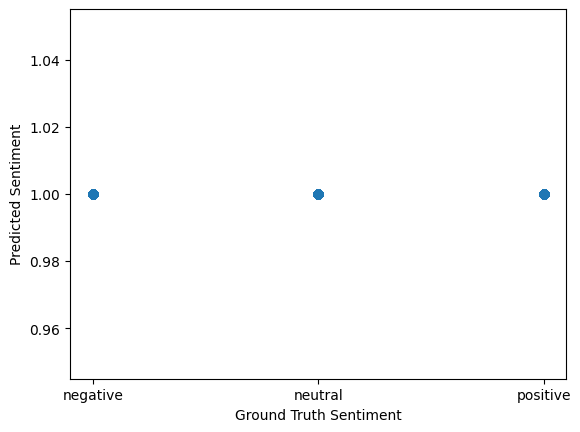

In [23]:
import matplotlib.pyplot as plt

# Plot predicted vs ground truth sentiment
plt.scatter(ground_truths, y_pred)
plt.xlabel("Ground Truth Sentiment")
plt.ylabel("Predicted Sentiment")
plt.show()


BERT, i.e. Bidirectional Encoder Representations from the Transformers, is a massive potential of language comprehension and learning mechanism. It's terrific because it can put words in the right context of sentences, which can, in turn, make its predictions more correct. Having information about language from massive online texts, we could simply reuse BERT to do the tasks which need sentiment recognition without needing to teach BERT on the second time. Yet correcting of the short paragraphs is quite time-taking. Hence it is not applicable on very long paragraphs. Furthermore, it might be hard to understand why BERT makes some of the choices that it does, that is true as well.
